In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, XGBRegressor
import xgboost as xgb

In [10]:
Best_Heckman_data = pd.read_csv("../../../Data/Best&Heckman/BestHeckman+SDSS+wise+LOFAR.csv")

In [11]:
# Only selecting data with a classification
Best_Heckman_data = Best_Heckman_data[Best_Heckman_data['Classification'] != 'Radio-loud AGN'] 

In [12]:
X = Best_Heckman_data[[c for c in Best_Heckman_data.columns if c != 'Classification']]
X = X[['Z_BEST', 'u_flux_corr',
       'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'Ks_flux_corr', 'Peak_flux',
       'Total_flux']]
y = Best_Heckman_data['Classification']

In [13]:
pd.Series(y).value_counts()/sum(pd.Series(y).value_counts())

jet-mode radio AGN/low-excitation radio galaxy          0.742364
star-forming galaxy                                     0.221319
quasar-like radio AGN / high-excitation radio galaxy    0.036317
Name: Classification, dtype: float64

In [14]:
le = LabelEncoder()
labels = np.unique(y.astype(str))
y = le.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [16]:
X_train.columns

Index(['Z_BEST', 'u_flux_corr', 'g_flux_corr', 'R_flux_corr', 'I_flux_corr',
       'z_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'J_flux_corr',
       'H_flux_corr', 'Ks_flux_corr', 'Peak_flux', 'Total_flux'],
      dtype='object')

In [17]:
from flaml import AutoML
automl = AutoML()

C:\Users\jespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\flaml\searcher\blendsearch.py:14: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
  from ray.tune.suggest import Searcher
C:\Users\jespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\flaml\searcher\blendsearch.py:15: DeprecationWarning: The module `ray.tune.suggest.optuna` has been moved to `ray.tune.search.optuna` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.optuna` with `ray.tune.search.optuna`.
  from ray.tune.suggest.optuna import OptunaSe

In [18]:
import warnings

#estimators = ['xgb_limitdepth']
#estimators = ['extra_tree']

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    automl.fit(X_train, y_train, task="classification", metric='accuracy',
                                #X_val=X_test , y_val=y_test.to_numpy(),
                                #ensemble=True,
                                #estimator_list=estimators, 
                                time_budget=60, n_jobs=8, 
                                eval_method='cv',
                                #log_file_name='general_extra_features3.log',
                                #starting_points=automl.best_config_per_estimator
              )

[flaml.automl: 09-22 11:43:30] {2390} INFO - task = classification
[flaml.automl: 09-22 11:43:30] {2392} INFO - Data split method: stratified
[flaml.automl: 09-22 11:43:30] {2396} INFO - Evaluation method: cv
[flaml.automl: 09-22 11:43:30] {2465} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 09-22 11:43:30] {2605} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 09-22 11:43:30] {2897} INFO - iteration 0, current learner lgbm
[flaml.automl: 09-22 11:43:30] {3025} INFO - Estimated sufficient time budget=1460s. Estimated necessary time budget=36s.
[flaml.automl: 09-22 11:43:30] {3072} INFO -  at 0.8s,	estimator lgbm's best error=0.2577,	best estimator lgbm's best error=0.2577
[flaml.automl: 09-22 11:43:30] {2897} INFO - iteration 1, current learner lgbm
[flaml.automl: 09-22 11:43:31] {3072} INFO -  at 1.0s,	estimator lgbm's best error=0.2577,	best estimator lgbm's best error=0.2577
[flaml.aut

[flaml.automl: 09-22 11:43:44] {3072} INFO -  at 14.9s,	estimator catboost's best error=0.1405,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:43:44] {2897} INFO - iteration 37, current learner catboost
[flaml.automl: 09-22 11:43:45] {3072} INFO -  at 15.3s,	estimator catboost's best error=0.1405,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:43:45] {2897} INFO - iteration 38, current learner catboost
[flaml.automl: 09-22 11:43:45] {3072} INFO -  at 15.7s,	estimator catboost's best error=0.1405,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:43:45] {2897} INFO - iteration 39, current learner catboost
[flaml.automl: 09-22 11:43:46] {3072} INFO -  at 16.2s,	estimator catboost's best error=0.1405,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:43:46] {2897} INFO - iteration 40, current learner rf
[flaml.automl: 09-22 11:43:47] {3072} INFO -  at 17.3s,	estimator rf's best error=0.0789,	best estimator rf's best error=0.0789
[flaml

[flaml.automl: 09-22 11:44:03] {2897} INFO - iteration 75, current learner extra_tree
[flaml.automl: 09-22 11:44:03] {3072} INFO -  at 33.6s,	estimator extra_tree's best error=0.0930,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:03] {2897} INFO - iteration 76, current learner catboost
[flaml.automl: 09-22 11:44:04] {3072} INFO -  at 33.9s,	estimator catboost's best error=0.1405,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:04] {2897} INFO - iteration 77, current learner catboost
[flaml.automl: 09-22 11:44:04] {3072} INFO -  at 34.3s,	estimator catboost's best error=0.1405,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:04] {2897} INFO - iteration 78, current learner extra_tree
[flaml.automl: 09-22 11:44:04] {3072} INFO -  at 34.4s,	estimator extra_tree's best error=0.0913,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:04] {2897} INFO - iteration 79, current learner catboost
[flaml.automl: 09-22 11:44:04] {3072

[flaml.automl: 09-22 11:44:15] {3072} INFO -  at 45.7s,	estimator rf's best error=0.0789,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:15] {2897} INFO - iteration 113, current learner xgb_limitdepth
[flaml.automl: 09-22 11:44:16] {3072} INFO -  at 45.9s,	estimator xgb_limitdepth's best error=0.0917,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:16] {2897} INFO - iteration 114, current learner extra_tree
[flaml.automl: 09-22 11:44:16] {3072} INFO -  at 46.1s,	estimator extra_tree's best error=0.0799,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:16] {2897} INFO - iteration 115, current learner xgb_limitdepth
[flaml.automl: 09-22 11:44:16] {3072} INFO -  at 46.4s,	estimator xgb_limitdepth's best error=0.0912,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:16] {2897} INFO - iteration 116, current learner rf
[flaml.automl: 09-22 11:44:17] {3072} INFO -  at 47.9s,	estimator rf's best error=0.0789,	best estimator rf'

[flaml.automl: 09-22 11:44:28] {3072} INFO -  at 58.8s,	estimator lgbm's best error=0.1001,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:28] {2897} INFO - iteration 151, current learner lgbm
[flaml.automl: 09-22 11:44:29] {3072} INFO -  at 59.0s,	estimator lgbm's best error=0.1001,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:29] {2897} INFO - iteration 152, current learner lgbm
[flaml.automl: 09-22 11:44:29] {3072} INFO -  at 59.2s,	estimator lgbm's best error=0.1001,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:29] {2897} INFO - iteration 153, current learner catboost
[flaml.automl: 09-22 11:44:29] {3072} INFO -  at 59.7s,	estimator catboost's best error=0.1405,	best estimator rf's best error=0.0789
[flaml.automl: 09-22 11:44:29] {2897} INFO - iteration 154, current learner lgbm
[flaml.automl: 09-22 11:44:30] {3072} INFO -  at 59.9s,	estimator lgbm's best error=0.1001,	best estimator rf's best error=0.0789
[flaml.automl: 09-

In [19]:
y_pred = automl.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.9382    0.9708    0.9542      1955
quasar-like radio AGN / high-excitation radio galaxy     0.4706    0.0842    0.1429        95
                                 star-forming galaxy     0.8921    0.9074    0.8997       583

                                            accuracy                         0.9248      2633
                                           macro avg     0.7670    0.6541    0.6656      2633
                                        weighted avg     0.9111    0.9248    0.9129      2633



In [118]:
model = XGBClassifier(use_label_encoder=False, 
                      max_depth=7, 
                      #reg_alpha=1,   
                      #min_child_weight=0.5, 
                      #reg_lambda=5,
                      #subsample=0.5,
                      eta=0.3, # Remember to reduce to 0.1 or 0.05 for better results
                      tree_method='gpu_hist', # exact is more precies, but this is much faster
                      gpu_id=1,
                      objective='multi:softprob',
                      eval_metric =['merror', 'mlogloss'],
                      nthread=8,
                      n_estimators=500,
                      )

In [120]:
bst = model.fit(X_train, y_train, 
                eval_set=[
                    (X_train, y_train),
                ], 
                #early_stopping_rounds=50,
                verbose=True, 
                #sample_weight=classes_weights,
               ) #

[0]	validation_0-merror:0.06829	validation_0-mlogloss:0.77394
[1]	validation_0-merror:0.06164	validation_0-mlogloss:0.58576
[2]	validation_0-merror:0.05784	validation_0-mlogloss:0.46139
[3]	validation_0-merror:0.05613	validation_0-mlogloss:0.37586
[4]	validation_0-merror:0.05471	validation_0-mlogloss:0.31456
[5]	validation_0-merror:0.05129	validation_0-mlogloss:0.26965
[6]	validation_0-merror:0.04806	validation_0-mlogloss:0.23439
[7]	validation_0-merror:0.04540	validation_0-mlogloss:0.20678
[8]	validation_0-merror:0.04207	validation_0-mlogloss:0.18571
[9]	validation_0-merror:0.04036	validation_0-mlogloss:0.16942
[10]	validation_0-merror:0.03789	validation_0-mlogloss:0.15609
[11]	validation_0-merror:0.03723	validation_0-mlogloss:0.14541
[12]	validation_0-merror:0.03571	validation_0-mlogloss:0.13611
[13]	validation_0-merror:0.03457	validation_0-mlogloss:0.12992
[14]	validation_0-merror:0.03334	validation_0-mlogloss:0.12285
[15]	validation_0-merror:0.03239	validation_0-mlogloss:0.11693
[1

[130]	validation_0-merror:0.00038	validation_0-mlogloss:0.01809
[131]	validation_0-merror:0.00038	validation_0-mlogloss:0.01791
[132]	validation_0-merror:0.00038	validation_0-mlogloss:0.01773
[133]	validation_0-merror:0.00038	validation_0-mlogloss:0.01754
[134]	validation_0-merror:0.00038	validation_0-mlogloss:0.01737
[135]	validation_0-merror:0.00038	validation_0-mlogloss:0.01716
[136]	validation_0-merror:0.00038	validation_0-mlogloss:0.01693
[137]	validation_0-merror:0.00038	validation_0-mlogloss:0.01678
[138]	validation_0-merror:0.00038	validation_0-mlogloss:0.01670
[139]	validation_0-merror:0.00038	validation_0-mlogloss:0.01662
[140]	validation_0-merror:0.00038	validation_0-mlogloss:0.01649
[141]	validation_0-merror:0.00038	validation_0-mlogloss:0.01639
[142]	validation_0-merror:0.00038	validation_0-mlogloss:0.01623
[143]	validation_0-merror:0.00038	validation_0-mlogloss:0.01613
[144]	validation_0-merror:0.00038	validation_0-mlogloss:0.01599
[145]	validation_0-merror:0.00038	valida

[259]	validation_0-merror:0.00038	validation_0-mlogloss:0.00694
[260]	validation_0-merror:0.00038	validation_0-mlogloss:0.00690
[261]	validation_0-merror:0.00038	validation_0-mlogloss:0.00688
[262]	validation_0-merror:0.00038	validation_0-mlogloss:0.00684
[263]	validation_0-merror:0.00038	validation_0-mlogloss:0.00682
[264]	validation_0-merror:0.00038	validation_0-mlogloss:0.00679
[265]	validation_0-merror:0.00038	validation_0-mlogloss:0.00675
[266]	validation_0-merror:0.00038	validation_0-mlogloss:0.00673
[267]	validation_0-merror:0.00038	validation_0-mlogloss:0.00669
[268]	validation_0-merror:0.00038	validation_0-mlogloss:0.00666
[269]	validation_0-merror:0.00038	validation_0-mlogloss:0.00664
[270]	validation_0-merror:0.00038	validation_0-mlogloss:0.00658
[271]	validation_0-merror:0.00038	validation_0-mlogloss:0.00656
[272]	validation_0-merror:0.00038	validation_0-mlogloss:0.00652
[273]	validation_0-merror:0.00038	validation_0-mlogloss:0.00648
[274]	validation_0-merror:0.00038	valida

[388]	validation_0-merror:0.00038	validation_0-mlogloss:0.00436
[389]	validation_0-merror:0.00038	validation_0-mlogloss:0.00435
[390]	validation_0-merror:0.00038	validation_0-mlogloss:0.00434
[391]	validation_0-merror:0.00038	validation_0-mlogloss:0.00434
[392]	validation_0-merror:0.00038	validation_0-mlogloss:0.00433
[393]	validation_0-merror:0.00038	validation_0-mlogloss:0.00432
[394]	validation_0-merror:0.00038	validation_0-mlogloss:0.00431
[395]	validation_0-merror:0.00038	validation_0-mlogloss:0.00429
[396]	validation_0-merror:0.00038	validation_0-mlogloss:0.00428
[397]	validation_0-merror:0.00038	validation_0-mlogloss:0.00427
[398]	validation_0-merror:0.00038	validation_0-mlogloss:0.00426
[399]	validation_0-merror:0.00038	validation_0-mlogloss:0.00426
[400]	validation_0-merror:0.00038	validation_0-mlogloss:0.00425
[401]	validation_0-merror:0.00038	validation_0-mlogloss:0.00423
[402]	validation_0-merror:0.00038	validation_0-mlogloss:0.00422
[403]	validation_0-merror:0.00038	valida

In [121]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.9455    0.9668    0.9560      1955
quasar-like radio AGN / high-excitation radio galaxy     0.4490    0.2316    0.3056        95
                                 star-forming galaxy     0.8957    0.8988    0.8973       583

                                            accuracy                         0.9252      2633
                                           macro avg     0.7634    0.6990    0.7196      2633
                                        weighted avg     0.9165    0.9252    0.9195      2633



In [122]:
import shap
shap.initjs()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


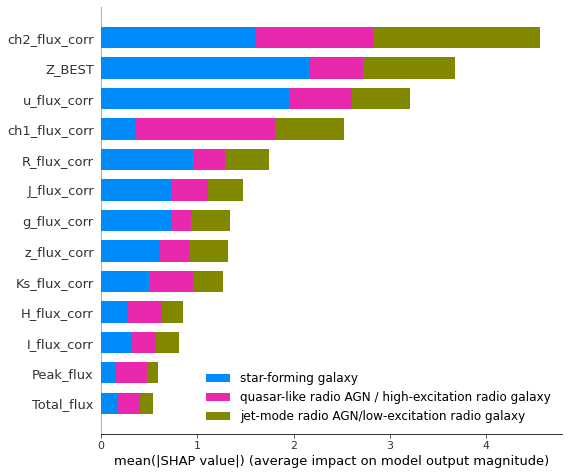

In [129]:
shap_values = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=labels)

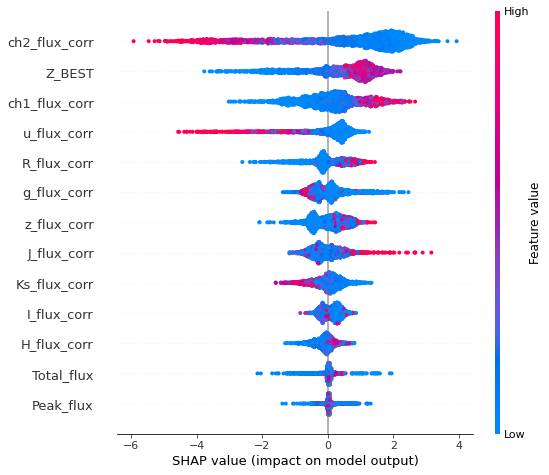

In [145]:
np.array(shap_values).shape

(3, 2633, 13)

In [148]:
shap_values[0].shape

(2633, 13)